# PROBLEM STATEMENT

Q.In this problem we used two datasets:  
    1.covid_19_india\
    2.covid_vaccine_statewise  
    
Using the dataset we analysed the data to find:  
    1. Number of active cases   
    2. Statewise Mortality and Recovery rates  
    3. States with maximum no. of active cases  
    4. States with minimum no. of active cases  
    5. Growth trend in 5 states with maximum active users.  
    6. Male vs Female vaccination  
    7. Top 5 most vaccinated states  
    8. Top 5 least vaccinated states  

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [76]:
covid_df=pd.read_csv('covid_19_india.csv')

In [77]:
## check whether data imported

covid_df.shape

(18110, 9)

In [78]:
##last 10 columns
covid_df.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18100,18101,2021-08-11,8:00 AM,Puducherry,-,-,119115,1800,121766
18101,18102,2021-08-11,8:00 AM,Punjab,-,-,582791,16322,599573
18102,18103,2021-08-11,8:00 AM,Rajasthan,-,-,944700,8954,953851
18103,18104,2021-08-11,8:00 AM,Sikkim,-,-,25095,356,28018
18104,18105,2021-08-11,8:00 AM,Tamil Nadu,-,-,2524400,34367,2579130
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [79]:
covid_df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)

In [80]:
covid_df.head(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2


In [81]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  18110 non-null  object
 1   State/UnionTerritory  18110 non-null  object
 2   Cured                 18110 non-null  int64 
 3   Deaths                18110 non-null  int64 
 4   Confirmed             18110 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 707.5+ KB


In [82]:
covid_df.describe()

,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [113]:
vaccine_df=pd.read_csv('covid_vaccine_statewise.csv')

In [114]:
vaccine_df.head(7)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19-01-2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20-01-2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21-01-2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22-01-2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0


In [85]:
covid_df['Date']=pd.to_datetime(covid_df['Date'],format='%Y-%m-%d')

In [86]:
##vaccine_df['Updated On']=pd.to_datetime(vaccine_df['Updated On'],format='%Y-%m-%d')

In [87]:
covid_df['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [88]:
##active cases

covid_df['Active_case']=covid_df['Confirmed']-covid_df['Cured']-covid_df['Deaths']

In [89]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_case
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [90]:
##pivot tables
statewise=pd.pivot_table(covid_df,values=['Confirmed','Cured','Deaths'],
                         index='State/UnionTerritory',aggfunc=max)

In [91]:
statewise.shape

(46, 3)

In [92]:
statewise.head(3)

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248


In [93]:
statewise['Recovery_Rate']=(statewise['Cured']*100)/statewise['Confirmed']

In [94]:
statewise['Mortality_Rate']=(statewise['Deaths']*100)/statewise['Confirmed']

In [95]:
statewise.head()

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971


In [96]:
##sorting the values in descending order in order of confirmed case

statewise=statewise.sort_values(by='Confirmed',ascending=False)

In [97]:
statewise.style.background_gradient(cmap='cubehelix')

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


<AxesSubplot:title={'center':'top 10 cities with most deaths'}, xlabel='State/UnionTerritory', ylabel='Deaths'>

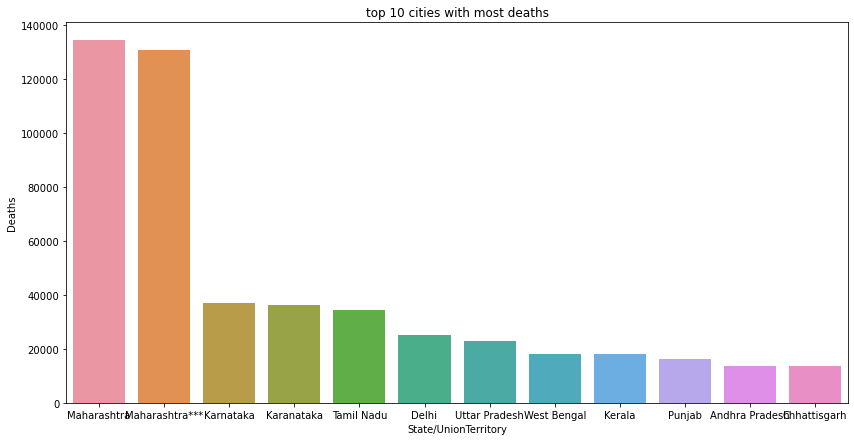

In [98]:
top_10_death_cases=covid_df.groupby(by=['State/UnionTerritory']).max()[['Deaths', 'Date']].sort_values(by=['Deaths'],ascending=False).reset_index()

import  matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(14,7)
##plotting top 10 cities with most deaths
plt.title('top 10 cities with most deaths',size=12)
plt.xlabel('States')
plt.ylabel('Deaths')
sns.barplot(data=top_10_death_cases.iloc[:12],y='Deaths',x='State/UnionTerritory',linewidth=1)

<AxesSubplot:title={'center':'top 10 cities with most active cases'}, xlabel='State/UnionTerritory', ylabel='Active_case'>

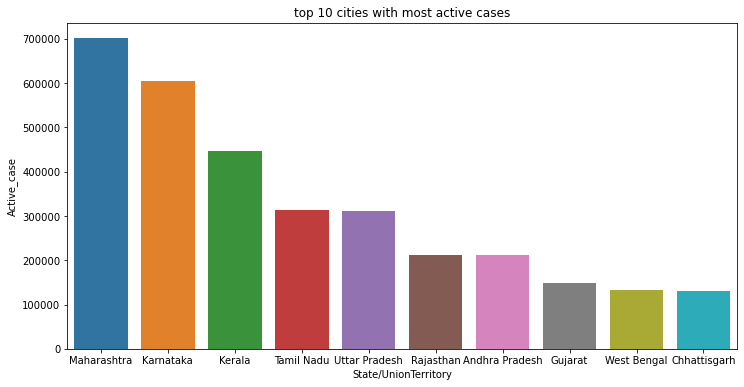

In [99]:
top_10_active_cases=covid_df.groupby(by=['State/UnionTerritory']).max()[['Active_case', 'Date']].sort_values(by=['Active_case'],ascending=False).reset_index()

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)


##plotting top 10 cities with most active cases
plt.title('top 10 cities with most active cases',size=12)
plt.xlabel('States')
plt.ylabel('Active cases')
sns.barplot(data=top_10_active_cases.iloc[:10],y='Active_case',x='State/UnionTerritory',linewidth=2)


In [100]:
covid_df.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'Active_case'],
      dtype='object')

Text(0.5, 1.0, 'Top 5 worst affected states')

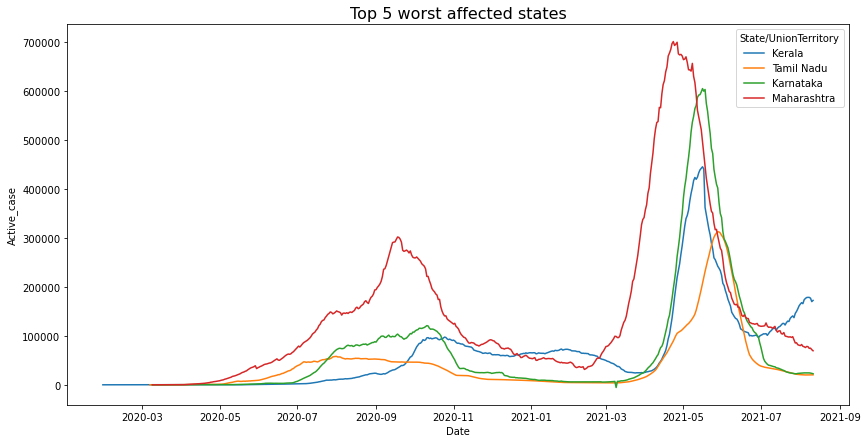

In [101]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(14,7)

ax=sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu'])],x='Date',y='Active_case',hue='State/UnionTerritory')

ax.set_title("Top 5 worst affected states",size=16)

## Conclusion

1. ACCORDING TO THE CURVE ABOVE THE CASES IN INDIA IN THE 5 STATES STARTED PEAKING AROUND APRIL,MAY AND JULY .

2. MAXIMUM IMPACT OF THIS WAVE OF COVID IS IN MAHARASHTRA FOR THIS PERIOD.

3. THE OVERALL CASES STARTED DIPPING IN AUGUST OR END OF JULY FOR MOST AFFECTED STATES.

In [115]:
vaccine_df.head(5)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19-01-2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20-01-2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [116]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19-01-2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20-01-2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [117]:
##rename updated on column to vaccination date

vaccine_df.rename(columns={'Updated On': 'vaccine_date'},inplace=True)

In [118]:
vaccine_df.head(3)

,vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0


In [121]:
##converting vaccine_date from string to date time format
##vaccine_df['vaccine_date']=pd.to_datetime(vaccine_df['vaccine_date'],format='%d-%m-%y')

In [120]:
type(vaccine_df['vaccine_date'][0])

str

In [122]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   vaccine_date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4   Sites                                7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10  Covaxin (Doses Administered)         7621 non-null   float64
 11  CoviShield (Doses Administered

In [123]:
##find the sum of all missing values in data

vaccine_df.isnull().sum()

vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
Sites                                   224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
Covaxin (Doses Administered)            224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [124]:
vaccination=vaccine_df.drop(columns=['Sputnik V (Doses Administered)','18-44 Years (Doses Administered)','AEFI','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [125]:
vaccination.head()

,vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19-01-2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20-01-2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [138]:
## male vs female vaccination

vaccine_male=vaccine_df['Male(Individuals Vaccinated)'].sum()

In [139]:
vaccine_male

7138698858.0

In [140]:
vaccine_female=vaccine_df['Female(Individuals Vaccinated)'].sum()

([<matplotlib.patches.Wedge at 0x1904bf79eb0>,
 [Text(-0.10472681424709744, 1.0950033307609863, 'Male'),
  Text(0.1047268142470973, -1.0950033307609863, 'Female')],
 [Text(-0.05712371686205314, 0.5972745440514471, '53.04'),
  Text(0.057123716862053066, -0.5972745440514471, '46.96')])

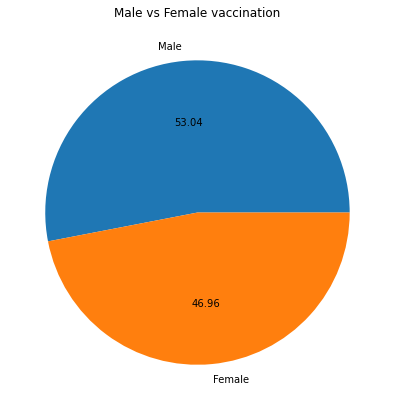

In [149]:
plt.title('Male vs Female vaccination')
plt.pie(labels=['Male','Female'],x=[vaccine_male,vaccine_female],autopct='%1.2f')

In [158]:
##for interactive charts plotly function px is used

px.pie(names=['Male','Female'],values=[vaccine_male,vaccine_female],title='Male vs Female vaccination')

## Conclusion

47% of female citizens in india are vaccinated whereas 53% of male citizens have been vaccinated

In [160]:
vaccine_df.head(3)

,vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0


In [163]:
##remove rows with state as india

vaccine=vaccine_df[vaccine_df['State']!='India']

In [167]:
##checking if the values are removed

vaccine[vaccine['State']=='India'].value_counts()

Series([], dtype: int64)

In [170]:
vaccine.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)

C:\Users\789456\AppData\Local\Temp\ipykernel_5992\2103419069.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
vaccine.head(2)

,vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


In [181]:
##state with maximum vaccinated individuals
vaccine_max=vaccine.groupby('State')['Total'].sum().to_frame('Total')


In [204]:
##checking what it does

##vaccine_max.to_frame('Total')





In [182]:
vaccine_max.head(2)

,Total
State,
Andaman and Nicobar Islands,8102125.0
Andhra Pradesh,564591113.0


In [186]:
vaccine_max=vaccine_max.sort_values('Total',ascending=False)[:5]

In [188]:
vaccine_max.iloc[:10]

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


<AxesSubplot:title={'center':'Top 5 most vaccinated states'}, xlabel='State', ylabel='Total'>

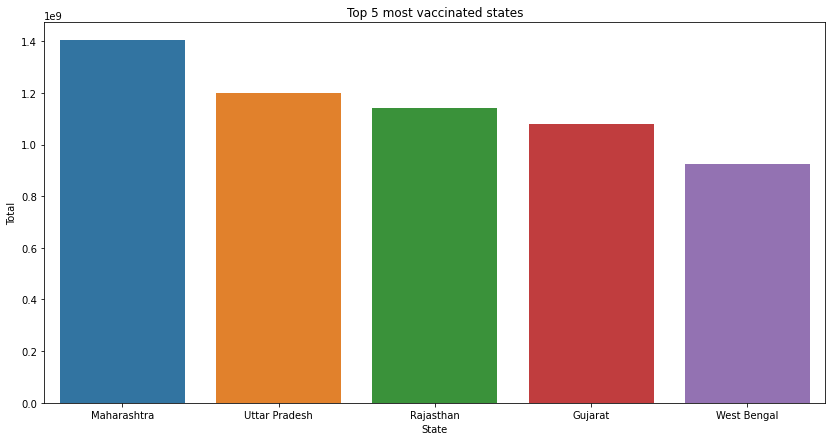

In [207]:
plt.title('Top 5 most vaccinated states')
sns.barplot(x=vaccine_max.index,y=vaccine_max.Total,data=vaccine_max)

### Conclusion

The maximum no of vaccinations have occured in Maharashtra.

## states with least no of vaccination



In [248]:
## Method 1
vaccine_min=vaccine.pivot_table(index=['State'],values=['Total'],aggfunc=sum)
vaccine_min.head()

,Total
State,
Andaman and Nicobar Islands,8102125.0
Andhra Pradesh,564591113.0
Arunachal Pradesh,21081557.0
Assam,239769091.0
Bihar,660847900.0


In [249]:
vaccine_min=vaccine_min.sort_values(by=['Total'],ascending=True)[:5]

In [250]:
vaccine_min

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


In [230]:
##Method 2

vaccine_min2=vaccine.groupby('State')['Total'].sum().to_frame('Total')

In [233]:
vaccine_min2=vaccine_min2.sort_values('Total',ascending=True)[:5]

In [234]:
vaccine_min2

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0
